In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos Por Tecnología.csv'

# Carga el archivo CSV en un DataFrame
df_Accesos_Por_Tecnologia = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Accesos_Por_Tecnologia.head())

Mostrando las primeras 5 filas de C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos Por Tecnología.csv:
    Año Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024         2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024         2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024         2        Catamarca    4951.0     10303.0       58355.0   
3  2024         2            Chaco    9448.0     57935.0       68944.0   
4  2024         2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0  


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10624\2419940656.py:20: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  df['Trimestre'] = pd.PeriodIndex(year=df['Año'], quarter=df['Trimestre'].astype(int))


                                           ADSL  Cablemodem  Fibra óptica  \
Año    Trimestre Provincia                                                  
2018.0 2018Q1    Buenos Aires         1452061.0   1793884.0      133928.0   
                 Capital Federal       349995.0    968483.0       35535.0   
                 Catamarca              27300.0      4415.0          15.0   
                 Chaco                  54879.0     40157.0         383.0   
                 Chubut                 56375.0     19591.0        1194.0   
...                                         ...         ...           ...   
2024.0 2024Q2    Santa Cruz              7768.0     14134.0       49545.0   
                 Santa Fe               88486.0    394939.0      390090.0   
                 Santiago Del Estero     5328.0     80000.0       30008.0   
                 Tierra Del Fuego        9357.0     47859.0        3684.0   
                 Tucumán                27968.0     20806.0      213753.0   

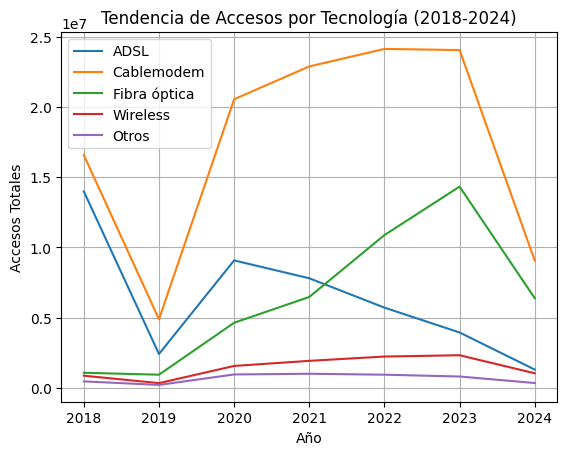

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos Por Tecnología.csv'

# Cargar el archivo en un DataFrame
df = pd.read_csv(archivo_csv)

# 1. Limpiar la columna 'Año' para eliminar caracteres no numéricos
df['Año'] = df['Año'].astype(str).str.extract(r'(\d{4})')  # Extraer solo los años de 4 dígitos
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')  # Convertir a números, asignando NaN a valores no válidos

# 2. Eliminar filas con valores nulos en 'Año'
df = df.dropna(subset=['Año'])

# 3. Convertir 'Trimestre' a un período trimestral
df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce')  # Asegurar que 'Trimestre' sea numérico
df = df.dropna(subset=['Trimestre'])  # Eliminar filas con trimestres no válidos
df['Trimestre'] = pd.PeriodIndex(year=df['Año'], quarter=df['Trimestre'].astype(int))

# 4. Eliminar valores negativos y nulos en columnas numéricas relevantes
for col in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir columnas a numéricas
    df = df[df[col] >= 0]  # Filtrar valores negativos

# 5. Filtrar datos entre 2018 y 2024
df = df[(df['Año'] >= 2018) & (df['Año'] <= 2024)]

# 6. Relación entre Año, Trimestre, Provincia y Tecnologías
resumen = df.groupby(['Año', 'Trimestre', 'Provincia'])[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()
print(resumen)

# 7. Exportar datos limpios
df.to_csv('C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos_Por_Tecnologia_Limpio.csv', index=False)

# 8. Visualización: Tendencia de accesos por tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for tecnologia in tecnologias:
    tendencia = df.groupby('Año')[tecnologia].sum()
    plt.plot(tendencia, label=tecnologia)

plt.xlabel('Año')
plt.ylabel('Accesos Totales')
plt.title('Tendencia de Accesos por Tecnología (2018-2024)')
plt.legend()
plt.grid()
plt.show()




C:\Users\Usuario\AppData\Local\Temp\ipykernel_10624\343414276.py:20: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  df['Trimestre'] = pd.PeriodIndex(year=df['Año'], quarter=df['Trimestre'].astype(int))


Resumen estadístico de las tecnologías:
               Año          ADSL    Cablemodem  Fibra óptica       Wireless  \
count   551.000000  5.510000e+02  5.510000e+02  5.510000e+02     551.000000   
mean   2020.994555  8.027865e+04  2.215954e+05  8.115395e+04   18694.070780   
std       1.887270  1.551808e+05  5.185260e+05  2.302999e+05   25263.654938   
min    2018.000000  2.230000e+03  3.146000e+03  0.000000e+00       0.000000   
25%    2020.000000  1.539100e+04  2.575600e+04  3.081000e+03    3996.000000   
50%    2021.000000  3.360400e+04  5.701400e+04  1.872700e+04   10402.000000   
75%    2023.000000  6.775350e+04  8.556500e+04  4.880050e+04   21886.000000   
max    2024.000000  1.452061e+06  2.797700e+06  1.849476e+06  138638.000000   

              Otros         Total  
count    551.000000  5.510000e+02  
mean    8611.863884  4.103339e+05  
std    13075.594132  8.590324e+05  
min       29.000000  2.139600e+04  
25%      762.000000  8.725600e+04  
50%     2970.000000  1.335520e+0

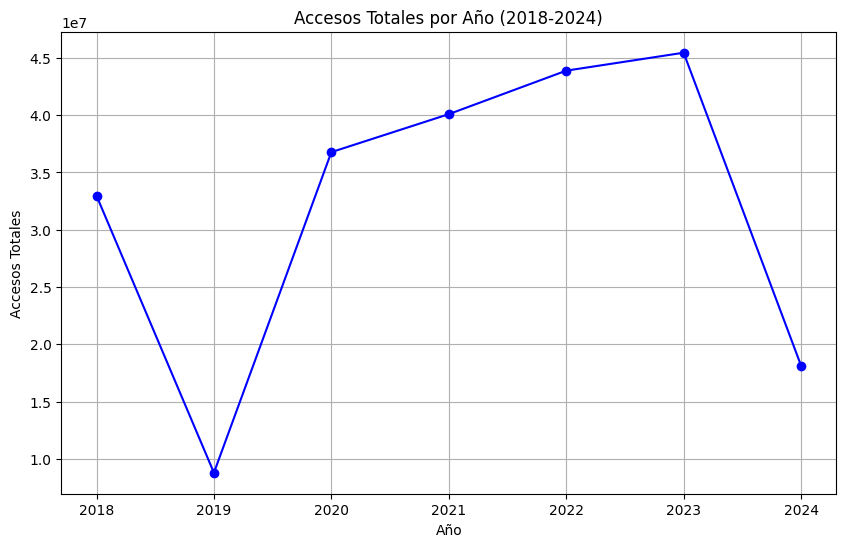

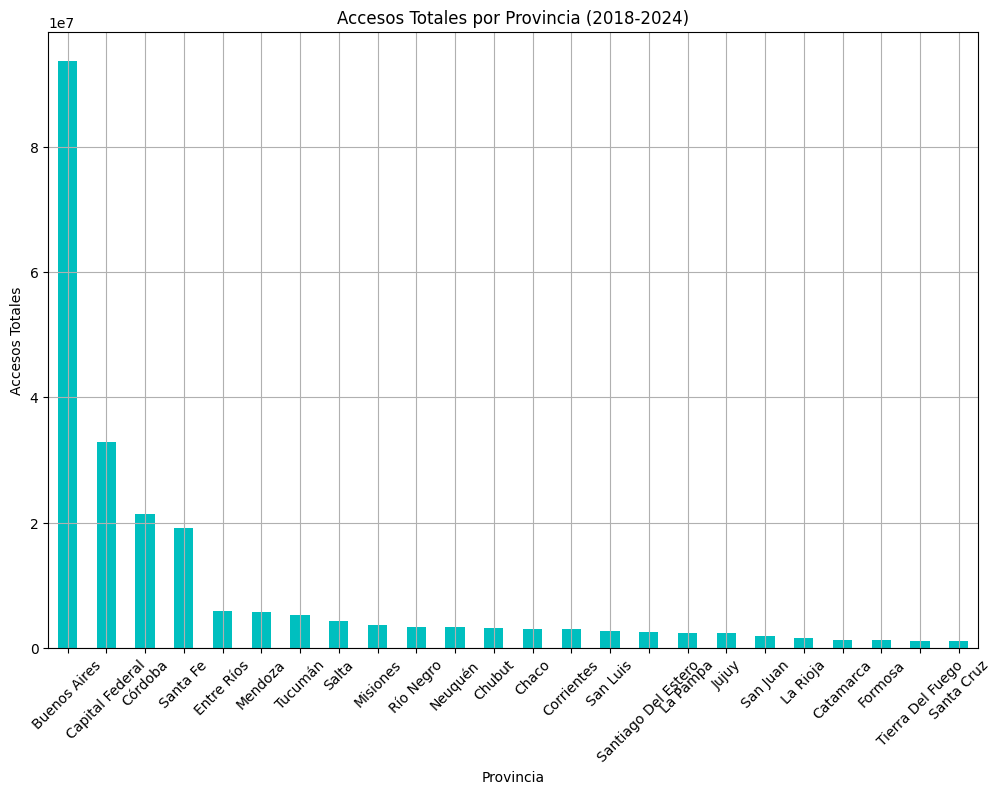

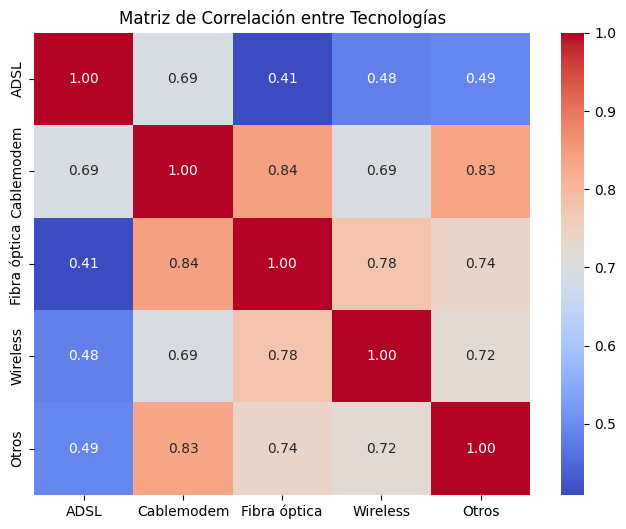

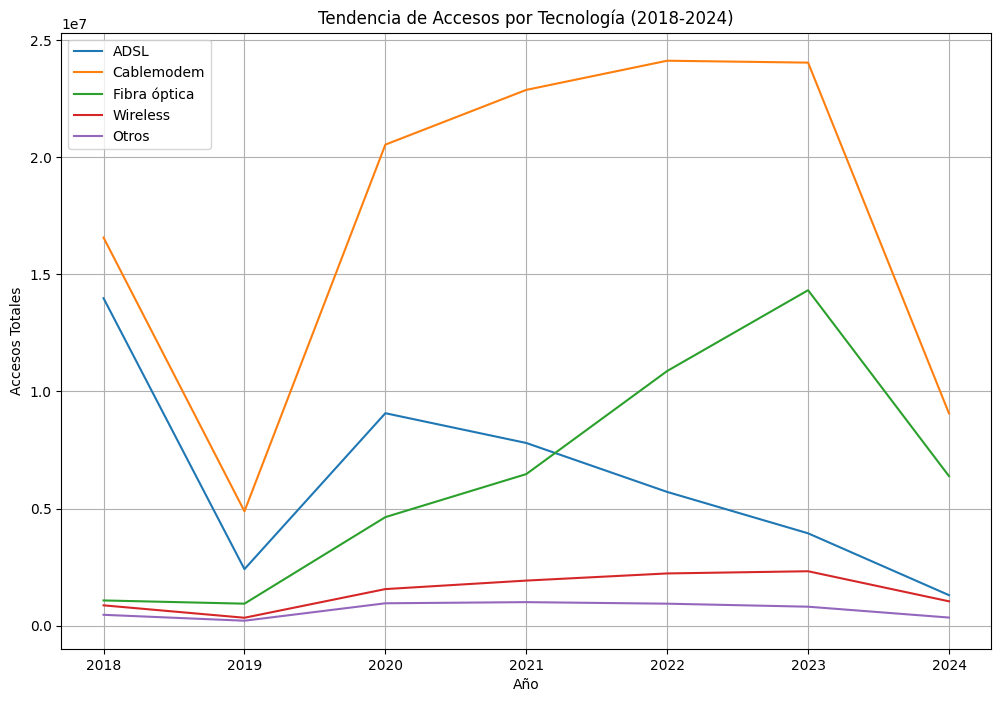

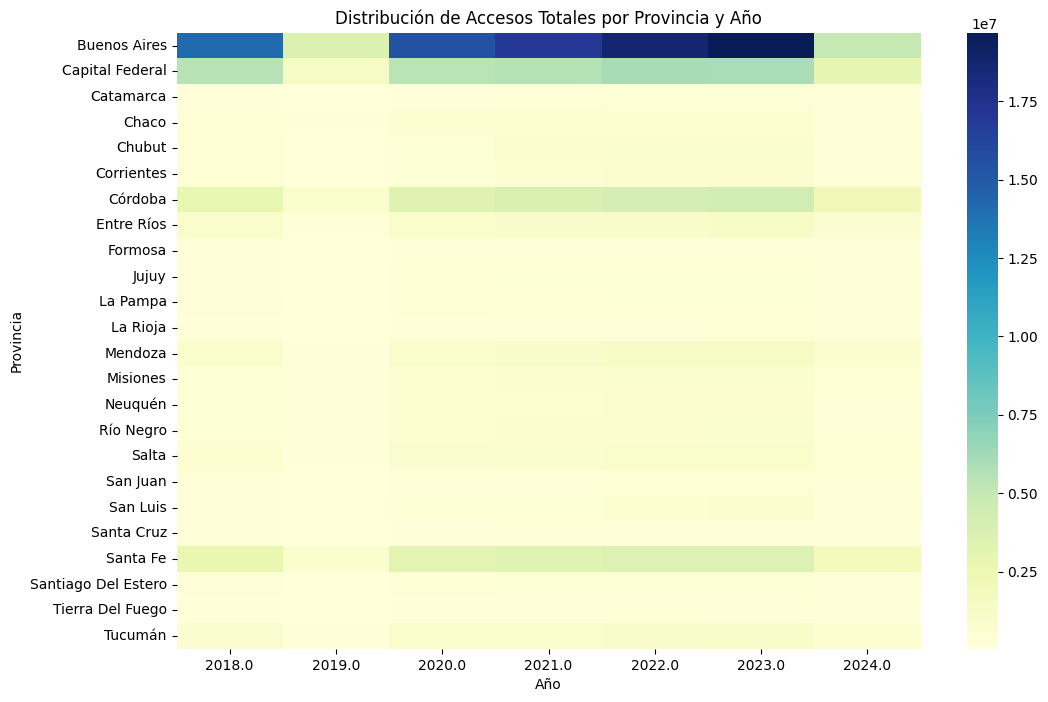

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Accesos Por Tecnología.csv'

# Cargar el archivo en un DataFrame
df = pd.read_csv(archivo_csv)

# 1. LIMPIEZA DE DATOS
# Limpiar la columna 'Año' para extraer valores numéricos válidos
df['Año'] = df['Año'].astype(str).str.extract(r'(\d{4})')  # Extraer años de 4 dígitos
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')  # Convertir a numérico
df = df.dropna(subset=['Año'])  # Eliminar filas con años no válidos

# Asegurar que 'Trimestre' sea numérico y válido
df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce')
df = df.dropna(subset=['Trimestre'])
df['Trimestre'] = pd.PeriodIndex(year=df['Año'], quarter=df['Trimestre'].astype(int))

# Eliminar valores negativos y filtrar periodo 2018-2024
for col in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df[df[col] >= 0]  # Eliminar valores negativos

df = df[(df['Año'] >= 2018) & (df['Año'] <= 2024)]

# 2. RESUMEN ESTADÍSTICO
print("Resumen estadístico de las tecnologías:")
print(df.describe())

# 3. DISTRIBUCIÓN TEMPORAL
# Accesos totales por año
totales_anuales = df.groupby('Año')['Total'].sum()
plt.figure(figsize=(10, 6))
plt.plot(totales_anuales, marker='o', color='b')
plt.title('Accesos Totales por Año (2018-2024)')
plt.xlabel('Año')
plt.ylabel('Accesos Totales')
plt.grid()
plt.show()

# 4. DISTRIBUCIÓN GEOGRÁFICA
# Accesos totales por provincia
totales_provincia = df.groupby('Provincia')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
totales_provincia.plot(kind='bar', color='c')
plt.title('Accesos Totales por Provincia (2018-2024)')
plt.xlabel('Provincia')
plt.ylabel('Accesos Totales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 5. CORRELACIONES ENTRE TECNOLOGÍAS
correlaciones = df[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Tecnologías')
plt.show()

# 6. TENDENCIAS POR TECNOLOGÍA
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.figure(figsize=(12, 8))
for tecnologia in tecnologias:
    tendencia = df.groupby('Año')[tecnologia].sum()
    plt.plot(tendencia, label=tecnologia)

plt.title('Tendencia de Accesos por Tecnología (2018-2024)')
plt.xlabel('Año')
plt.ylabel('Accesos Totales')
plt.legend()
plt.grid()
plt.show()

# 7. VARIACIÓN POR PROVINCIA Y AÑO
pivot = df.pivot_table(values='Total', index='Provincia', columns='Año', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Distribución de Accesos Totales por Provincia y Año')
plt.xlabel('Año')
plt.ylabel('Provincia')
plt.show()


Crecimiento por provincia y año (las tecnologías más destacadas):
                    Mayor Crecimiento  Valor Crecimiento
Provincia    Año                                        
Buenos Aires 2018.0              ADSL                0.0
             2019.0      Fibra óptica           -60844.0
             2020.0        Cablemodem          7088759.0
             2021.0        Cablemodem           977446.0
             2022.0      Fibra óptica          1839339.0
...                               ...                ...
Tucumán      2020.0              ADSL           445210.0
             2021.0        Cablemodem           130205.0
             2022.0      Fibra óptica           274668.0
             2023.0      Fibra óptica           198832.0
             2024.0             Otros            -1056.0

[168 rows x 2 columns]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10624\2827008971.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


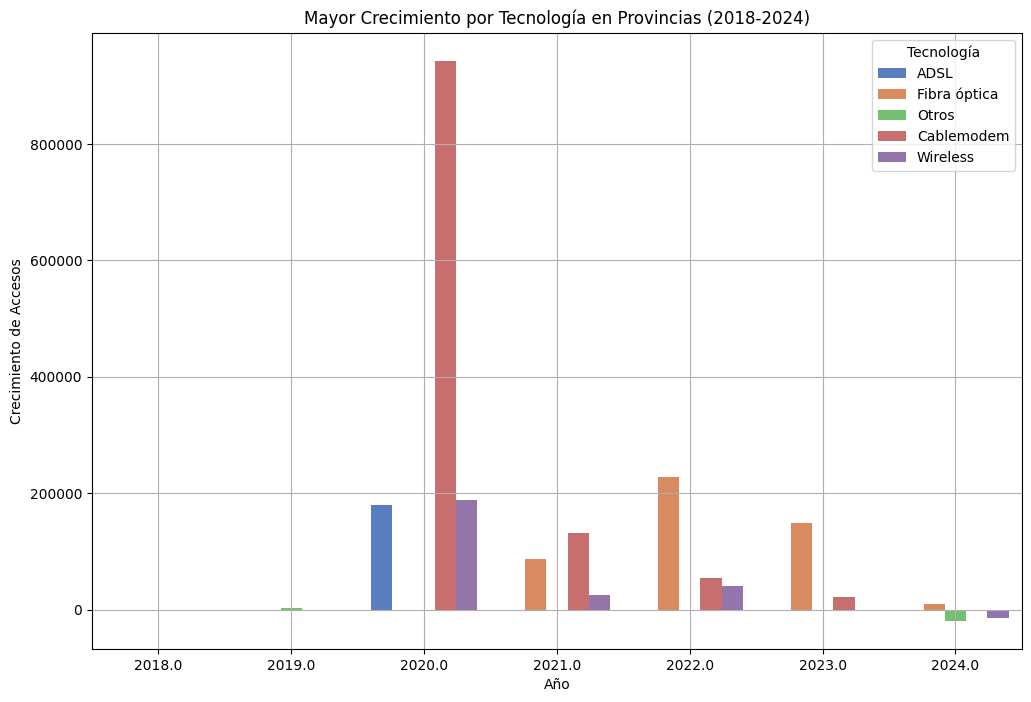

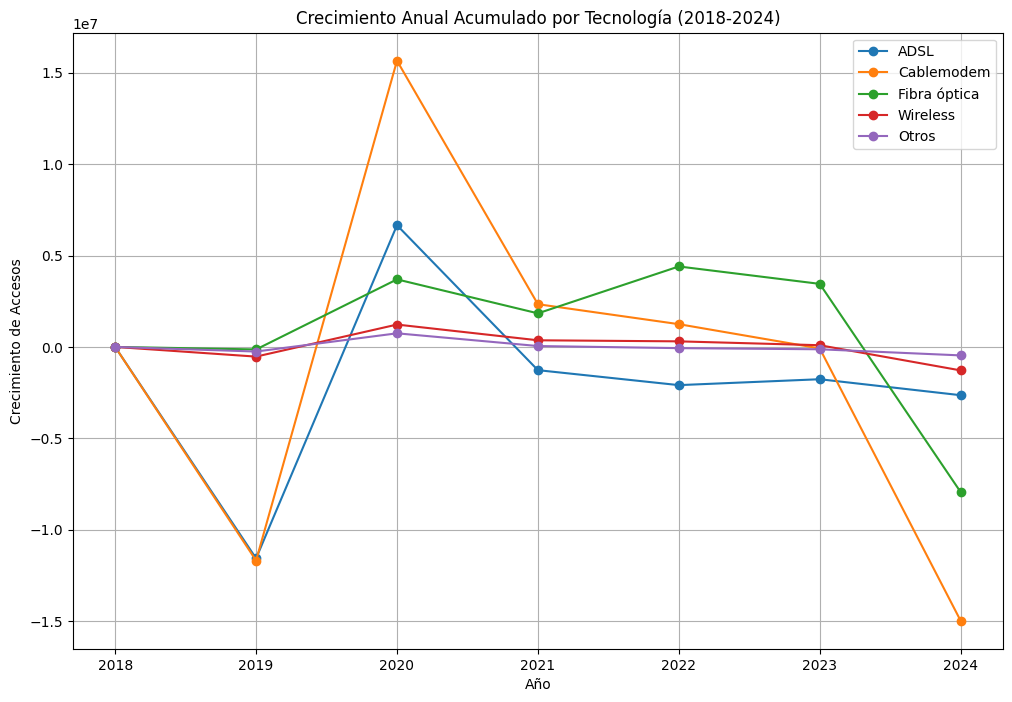

In [15]:
# 8. CRECIMIENTO POR TECNOLOGÍA EN CADA PROVINCIA Y AÑO

# Crear una tabla dinámica para sumar accesos por provincia, año y tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
pivot_tecnologias = df.pivot_table(
    values=tecnologias,
    index=['Provincia', 'Año'],
    aggfunc='sum',
    fill_value=0
)

# Calcular el crecimiento de cada tecnología entre años consecutivos
crecimiento = pivot_tecnologias.groupby('Provincia').diff().fillna(0)

# Identificar la tecnología con mayor crecimiento por provincia y año
crecimiento['Mayor Crecimiento'] = crecimiento[tecnologias].idxmax(axis=1)
crecimiento['Valor Crecimiento'] = crecimiento[tecnologias].max(axis=1)

# Resumen de los resultados
print("Crecimiento por provincia y año (las tecnologías más destacadas):")
print(crecimiento[['Mayor Crecimiento', 'Valor Crecimiento']])

# Visualización del crecimiento
plt.figure(figsize=(12, 8))
sns.barplot(
    data=crecimiento.reset_index(),
    x='Año',
    y='Valor Crecimiento',
    hue='Mayor Crecimiento',
    ci=None,
    palette='muted'
)
plt.title('Mayor Crecimiento por Tecnología en Provincias (2018-2024)')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Accesos')
plt.legend(title='Tecnología')
plt.grid()
plt.show()

# Crecimiento acumulativo por tecnología y año
acumulativo = df.groupby(['Año'])[tecnologias].sum().diff().fillna(0)
plt.figure(figsize=(12, 8))
for tecnologia in tecnologias:
    plt.plot(acumulativo.index, acumulativo[tecnologia], marker='o', label=tecnologia)

plt.title('Crecimiento Anual Acumulado por Tecnología (2018-2024)')
plt.xlabel('Año')
plt.ylabel('Crecimiento de Accesos')
plt.legend()
plt.grid()
plt.show()
